In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

cs_df = pd.read_csv("/content/csgo_round_snapshots.csv")
print(cs_df.head(), cs_df.shape)

   time_left  ct_score  ...  t_grenade_decoygrenade round_winner
0     175.00       0.0  ...                     0.0           CT
1     156.03       0.0  ...                     0.0           CT
2      96.03       0.0  ...                     0.0           CT
3      76.03       0.0  ...                     0.0           CT
4     174.97       1.0  ...                     0.0           CT

[5 rows x 97 columns] (122410, 97)


In [5]:
le = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le.fit(cs_df["round_winner"])
le3.fit(cs_df["bomb_planted"])
le2.fit(cs_df["map"])
cs_df["round_winner_numeric"] = le.transform(cs_df["round_winner"])
cs_df["bomb_planted"] = le3.transform(cs_df["bomb_planted"])
cs_df["map"] = le2.transform(cs_df["map"])
cs_df["map"] = cs_df.map.astype('float64')
cs_df["bomb_planted"] = cs_df.bomb_planted.astype('float64')
cs_df["round_winner_numeric"] = cs_df.round_winner_numeric.astype('category')
print(cs_df.bomb_planted, cs_df.dtypes)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
122405    1.0
122406    0.0
122407    0.0
122408    0.0
122409    0.0
Name: bomb_planted, Length: 122410, dtype: float64 time_left                    float64
ct_score                     float64
t_score                      float64
map                          float64
bomb_planted                 float64
                              ...   
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                  object
round_winner_numeric        category
Length: 98, dtype: object


In [6]:
cs_df.isnull().sum()

time_left                   0
ct_score                    0
t_score                     0
map                         0
bomb_planted                0
                           ..
t_grenade_molotovgrenade    0
ct_grenade_decoygrenade     0
t_grenade_decoygrenade      0
round_winner                0
round_winner_numeric        0
Length: 98, dtype: int64

In [7]:
cs_df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,round_winner_numeric
0,175.00,0.0,0.0,1.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,1.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,1.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,1.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0


In [8]:
cols_to_norm = ['time_left', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money']
cs_df[cols_to_norm] = cs_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.std()))

In [9]:
cs_df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,round_winner_numeric
0,3.212875,0.0,0.0,1.0,0.0,3.779481,3.573495,0.000000,0.000000,0.356664,0.328871,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,2.864579,0.0,0.0,1.0,0.0,3.779481,3.573495,2.338775,1.718444,0.053500,0.053442,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,1.762959,0.0,0.0,1.0,0.0,2.955554,2.858796,1.718999,1.145629,0.066874,0.041109,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,1.395753,0.0,0.0,1.0,0.0,2.955554,2.858796,1.718999,1.145629,0.066874,0.041109,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,3.212324,1.0,0.0,1.0,0.0,3.779481,3.573495,1.122612,0.000000,1.636195,0.883842,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0


In [10]:
X = cs_df.drop(["round_winner_numeric", "round_winner"], axis = 1)
y = cs_df["round_winner_numeric"]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 0, shuffle=True)

In [16]:
#################################
# 1) Dropping constant features using variance threshold 
# Variance threshold will remove all the 0 variance features
#################################

vat_th = VarianceThreshold(threshold=0.01)
vat_th.fit(train_X)
vat_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [17]:
zvar_col = [column for column in train_X.columns if column not in train_X.columns[vat_th.get_support()]]
print(len(zvar_col))

for fet in zvar_col:
  print(fet)

37
t_weapon_aug
ct_weapon_bizon
t_weapon_bizon
ct_weapon_elite
t_weapon_elite
t_weapon_famas
ct_weapon_g3sg1
t_weapon_g3sg1
ct_weapon_glock
ct_weapon_m249
t_weapon_m249
t_weapon_m4a1s
ct_weapon_mac10
ct_weapon_mag7
t_weapon_mag7
ct_weapon_mp5sd
t_weapon_mp5sd
ct_weapon_mp7
t_weapon_mp7
t_weapon_mp9
ct_weapon_negev
t_weapon_negev
ct_weapon_nova
t_weapon_nova
ct_weapon_p90
t_weapon_p90
ct_weapon_r8revolver
t_weapon_r8revolver
ct_weapon_sawedoff
t_weapon_sawedoff
ct_weapon_scar20
t_weapon_scar20
ct_weapon_xm1014
t_weapon_xm1014
t_weapon_fiveseven
t_weapon_p2000
ct_weapon_tec9


In [18]:
train_X = train_X.drop(zvar_col, axis=1)
test_X = test_X.drop(zvar_col, axis=1)

In [19]:
train_X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_famas,ct_weapon_galilar,t_weapon_galilar,t_weapon_glock,ct_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,t_weapon_mac10,ct_weapon_mp9,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
4481,1.375189,9.0,4.0,6.0,0.0,3.779481,3.573495,2.876693,2.778151,0.387872,0.612523,1.0,5.0,2.0,5.0,5.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,0.0
78244,3.211223,4.0,6.0,5.0,0.0,3.779481,3.573495,1.730693,0.000000,1.600529,5.229056,2.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61042,0.858346,10.0,3.0,6.0,0.0,2.328160,0.550318,2.233530,0.887863,0.392330,0.246654,2.0,2.0,3.0,4.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50891,1.651512,5.0,6.0,1.0,0.0,3.023585,3.573495,2.338775,2.864073,1.101200,1.434702,3.0,5.0,2.0,4.0,5.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,4.0,3.0,0.0,4.0,1.0,0.0,0.0,3.0,0.0,0.0
106412,0.274487,2.0,12.0,1.0,0.0,0.151179,1.801042,0.567153,2.199608,0.004458,0.842733,1.0,4.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,3.211590,9.0,15.0,7.0,0.0,3.779481,3.573495,0.584694,0.572815,2.180108,1.109941,1.0,1.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,1.376291,9.0,10.0,3.0,0.0,3.779481,3.573495,0.000000,2.766695,1.226032,0.271319,0.0,5.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0
42613,0.439546,3.0,0.0,4.0,1.0,2.267689,2.858796,1.754081,2.291259,0.633078,0.596080,2.0,2.0,1.0,3.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
43567,3.086739,8.0,4.0,3.0,0.0,3.779481,3.573495,2.841611,2.864073,1.903693,0.217877,5.0,4.0,4.0,5.0,5.0,1.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,4.0,0.0,0.0


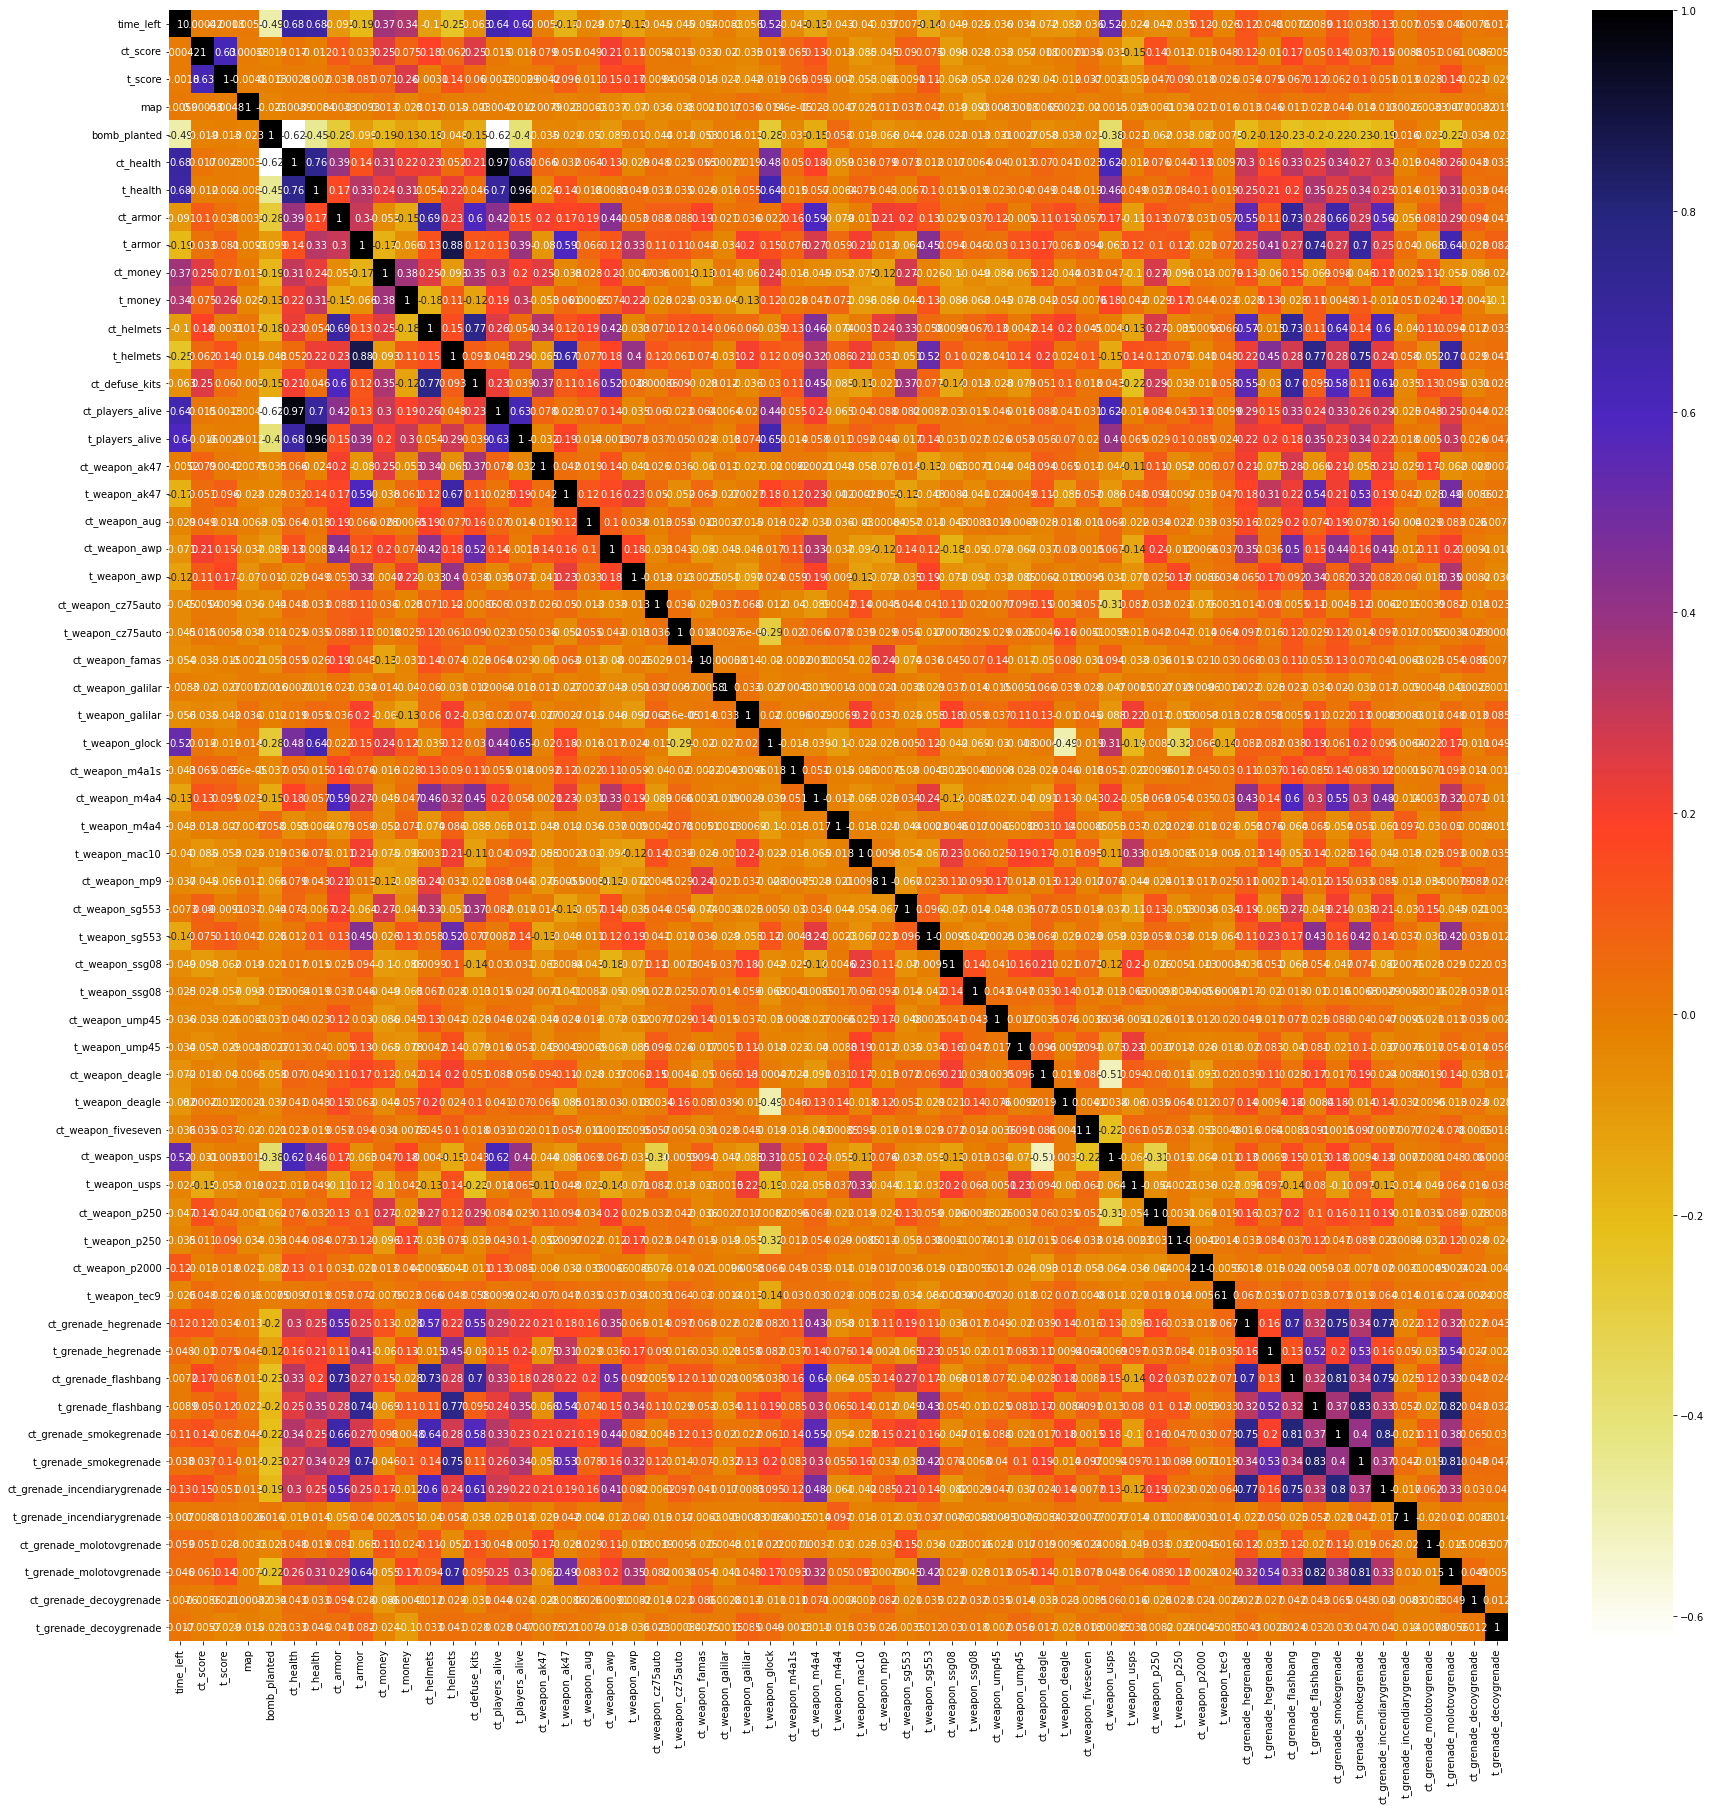

In [20]:
#################################
# 2) CORRELATION 
#################################

plt.figure(figsize = (30, 30))
correlation_X = train_X.corr()
sns.heatmap(correlation_X, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
### COPIED FROM: https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(train_X, 0.80)
print(len(corr_features), corr_features)

7 {'t_players_alive', 'ct_grenade_smokegrenade', 'ct_grenade_incendiarygrenade', 't_helmets', 't_grenade_molotovgrenade', 'ct_players_alive', 't_grenade_smokegrenade'}


In [23]:
train_X = train_X.drop(corr_features, axis=1)
test_X = test_X.drop(corr_features, axis=1)

In [24]:
train_X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,ct_defuse_kits,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_famas,ct_weapon_galilar,t_weapon_galilar,t_weapon_glock,ct_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,t_weapon_mac10,ct_weapon_mp9,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
4481,1.375189,9.0,4.0,6.0,0.0,3.779481,3.573495,2.876693,2.778151,0.387872,0.612523,1.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0
78244,3.211223,4.0,6.0,5.0,0.0,3.779481,3.573495,1.730693,0.000000,1.600529,5.229056,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
61042,0.858346,10.0,3.0,6.0,0.0,2.328160,0.550318,2.233530,0.887863,0.392330,0.246654,2.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
50891,1.651512,5.0,6.0,1.0,0.0,3.023585,3.573495,2.338775,2.864073,1.101200,1.434702,3.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0
106412,0.274487,2.0,12.0,1.0,0.0,0.151179,1.801042,0.567153,2.199608,0.004458,0.842733,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,3.211590,9.0,15.0,7.0,0.0,3.779481,3.573495,0.584694,0.572815,2.180108,1.109941,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,1.376291,9.0,10.0,3.0,0.0,3.779481,3.573495,0.000000,2.766695,1.226032,0.271319,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0
42613,0.439546,3.0,0.0,4.0,1.0,2.267689,2.858796,1.754081,2.291259,0.633078,0.596080,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
43567,3.086739,8.0,4.0,3.0,0.0,3.779481,3.573495,2.841611,2.864073,1.903693,0.217877,5.0,4.0,1.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0


In [31]:
################################# 
# 3) mutual information
#################################

#COPIED FROM: https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(train_X, train_y)
mutual_info

array([1.40988105e-01, 1.19882002e-02, 1.20948838e-02, 1.92435236e+00,
       3.17293786e-03, 1.43030584e-02, 1.50095407e-02, 2.08597844e-02,
       1.90530094e-02, 2.88408646e-02, 2.59392672e-02, 2.24444052e-03,
       1.50343043e-03, 3.86907020e-03, 3.35531570e-03, 1.10753275e-02,
       2.11429406e-02, 1.91584323e-02, 5.81923774e-03, 3.54939130e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.11513580e-03,
       5.59549706e-04, 1.47218387e-03, 1.19012863e-03, 4.13741589e-03,
       4.13219098e-03, 1.24057074e-03, 6.96266637e-03, 9.22147441e-03,
       9.34824336e-03, 1.50740924e-03, 4.17112198e-03, 0.00000000e+00,
       2.97476567e-03, 0.00000000e+00, 5.72001956e-06, 4.33198619e-03,
       0.00000000e+00, 5.02301726e-03, 7.42730049e-03, 4.21376427e-03,
       0.00000000e+00, 1.03567923e-02, 5.80924004e-03, 0.00000000e+00,
       0.00000000e+00, 3.17843239e-03, 0.00000000e+00, 3.86510058e-03])

In [32]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_X.columns
mutual_info.sort_values(ascending=False)

map                            1.924352
time_left                      0.140988
ct_money                       0.028841
t_money                        0.025939
ct_weapon_awp                  0.021143
ct_armor                       0.020860
t_weapon_awp                   0.019158
t_armor                        0.019053
t_health                       0.015010
ct_health                      0.014303
t_score                        0.012095
ct_score                       0.011988
ct_weapon_aug                  0.011075
t_grenade_hegrenade            0.010357
t_weapon_ssg08                 0.009348
ct_weapon_ssg08                0.009221
ct_weapon_p2000                0.007427
t_weapon_sg553                 0.006963
ct_weapon_cz75auto             0.005819
ct_grenade_flashbang           0.005809
t_weapon_p250                  0.005023
t_weapon_usps                  0.004332
t_weapon_tec9                  0.004214
t_weapon_ump45                 0.004171
t_weapon_mac10                 0.004137


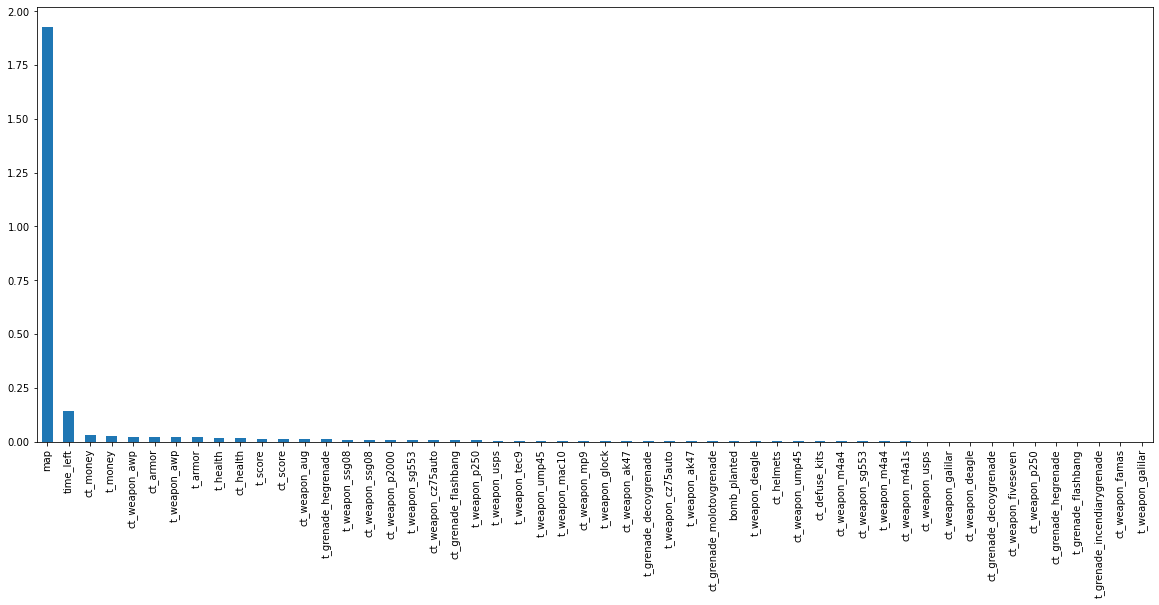

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [34]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=18)
sel_five_cols.fit(train_X, train_y)
train_X.columns[sel_five_cols.get_support()]

Index(['time_left', 'ct_score', 't_score', 'map', 'ct_health', 't_health',
       'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 't_weapon_sg553', 'ct_weapon_ssg08',
       't_weapon_ssg08', 't_grenade_hegrenade', 'ct_grenade_flashbang'],
      dtype='object')

In [37]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(train_X, train_y)


DecisionTreeClassifier()

In [38]:
model.score(test_X, test_y)

1.0

In [11]:
pip install xgboost

In [25]:
from xgboost import XGBClassifier
mdl = XGBClassifier()
xg = mdl.fit(train_X, train_y)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
predicted_y = xg.predict(test_X)
mdl.score(test_X,test_y)

0.7545679819186886

In [27]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(train_X,train_y)


In [49]:
model.score(test_X,test_y)
print(classification_report(test_X,test_y))

KeyboardInterrupt: ignored